In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import os

In [2]:
df = pd.read_csv('../data/sales_data.csv')

In [3]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Verificação de dados ausentes

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Analisando Outliers

In [8]:
sns.boxplot(x=df['gross income'])

<Axes: xlabel='gross income'>

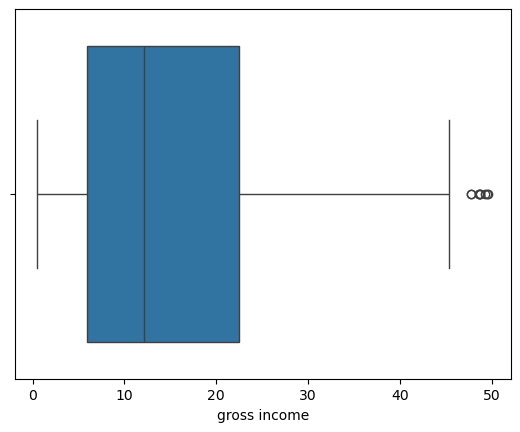

In [9]:
plt.show()

In [10]:
sns.boxplot(x=df['Unit price'])

<Axes: xlabel='Unit price'>

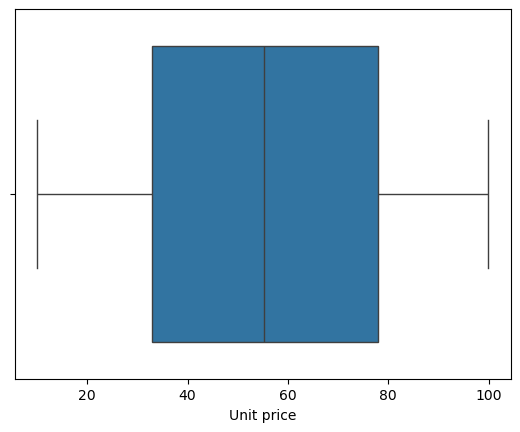

In [11]:
plt.show()

### Análise Exploratória

In [12]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### 1) Qual linha de produto gerou o maior total em vendas?

In [13]:
sales_by_product = df.groupby('Product line')['Total'].sum().sort_values()

In [14]:
sales_by_product

Product line
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Fashion accessories       54305.8950
Electronic accessories    54337.5315
Sports and travel         55122.8265
Food and beverages        56144.8440
Name: Total, dtype: float64

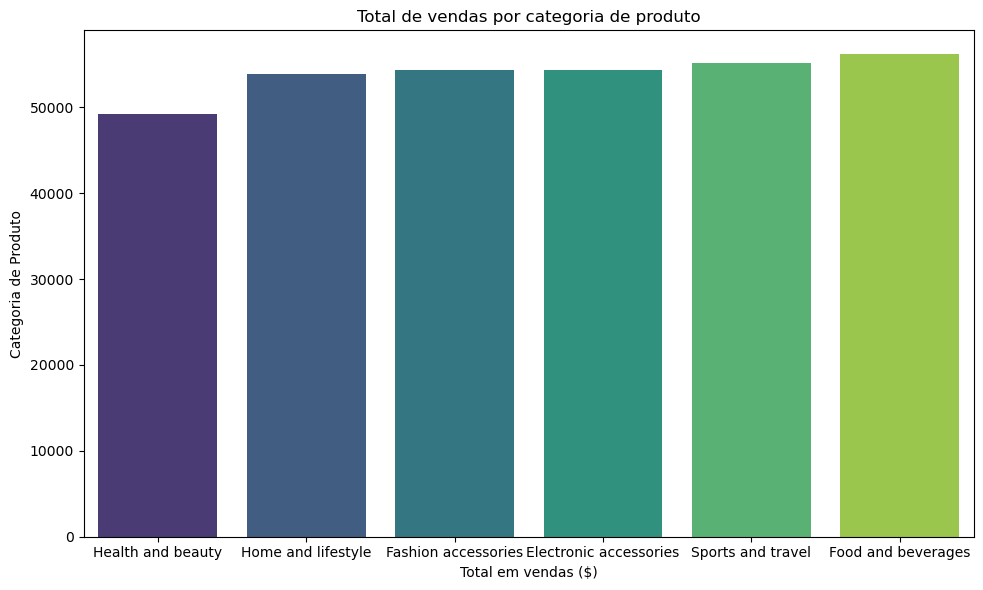

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, hue=sales_by_product.index, palette='viridis')
plt.title('Total de vendas por categoria de produto')
plt.xlabel('Total em vendas ($)')
plt.ylabel('Categoria de Produto')
plt.tight_layout()
plt.show()

#### R: Food and beverages (Produtos alimentícios) foi vencedor em quantidade de produtos vendidos. Faz sentido, considerando que se trata de um dataset de supermercado.

#### 2) Qual a filial que aprensentou maior lucro bruto?

In [16]:
profit_by_branch = df.groupby('Branch')['gross income'].sum()

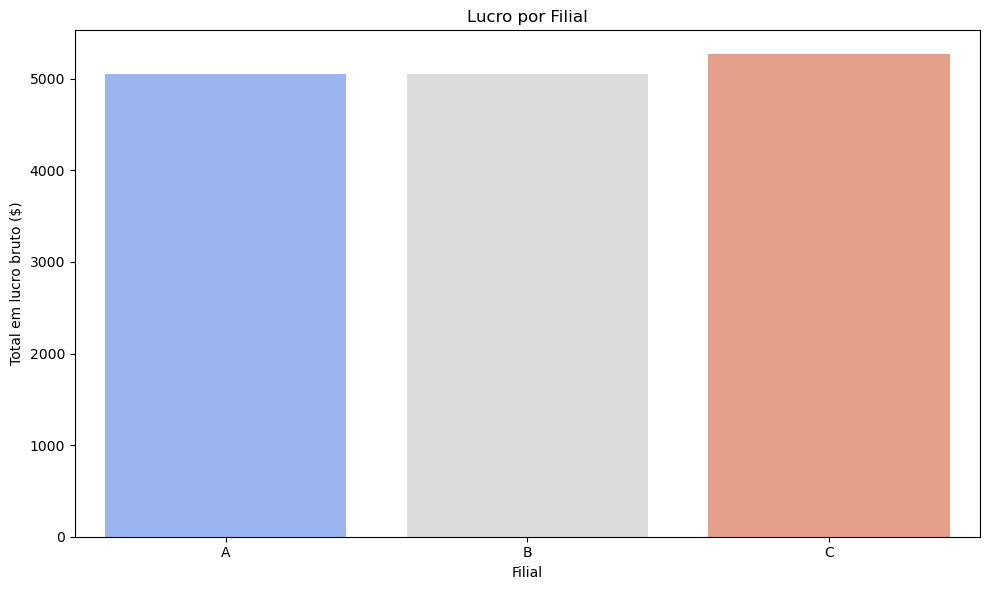

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_branch.index, y=profit_by_branch.values, hue=profit_by_branch.index, palette='coolwarm')
plt.title('Lucro por Filial')
plt.xlabel('Filial')
plt.ylabel('Total em lucro bruto ($)')
plt.tight_layout()
plt.show()

#### R: A filial 'C' apresentou maior valor para lucro bruto. Isso indica que essa filial tem um desempenho superior em termos de desempenho, o que pode ser interessante para investigar mais a fundo, como estratégias de vendas ou mix de produtos.

#### 3) Qual linha de produto teve a maior quantidade de vendas?

In [18]:
best_selling_product = df.groupby('Product line')['Quantity'].sum().sort_values()

In [19]:
best_selling_product

Product line
Health and beauty         854
Fashion accessories       902
Home and lifestyle        911
Sports and travel         920
Food and beverages        952
Electronic accessories    971
Name: Quantity, dtype: int64

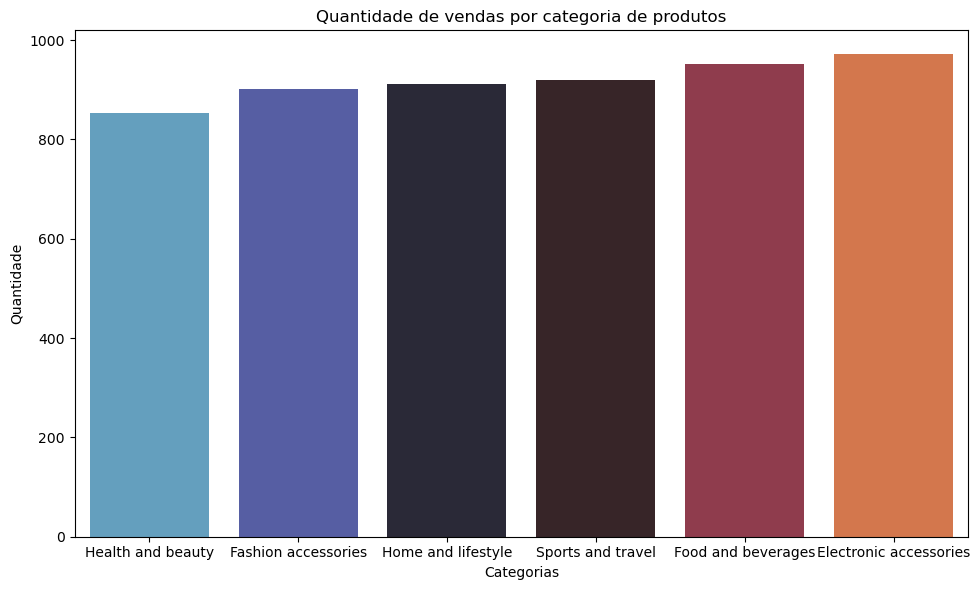

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_product.index, y=best_selling_product.values, hue=best_selling_product.index, palette='icefire')
plt.title('Quantidade de vendas por categoria de produtos')
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

#### R: A linha de produto Electronic accessories foi a mais vendida em termos de quantidade. Isso foi surpreendente, considerando que o dataset representa um supermercado — esperava que Food and beverages liderasse. Esse resultado pode indicar que eletrônicos de pequeno porte têm boa saída ou promoções frequentes.

#### 4) Existe variação de vendas por dia da semana?

In [21]:
df_copy = df.copy()

In [22]:
df_copy['Weekdays'] = pd.to_datetime(df['Date']).dt.day_name()
df_copy

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekdays
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday


In [23]:
weekday_variations = df_copy.groupby('Weekdays')['Total'].sum().sort_values()

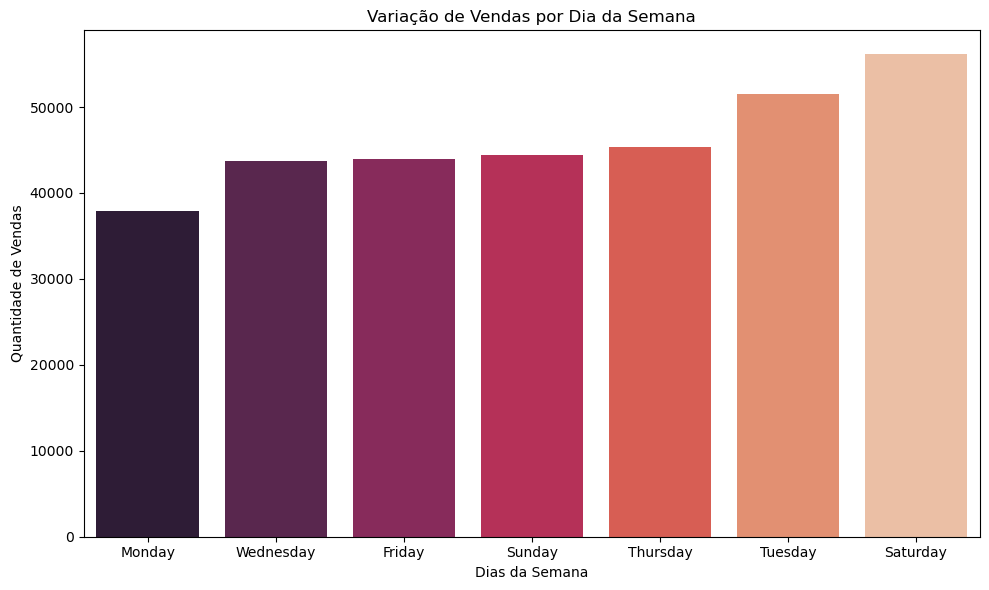

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_variations.index, y=weekday_variations.values, hue=weekday_variations.index, palette='rocket')
plt.title('Variação de Vendas por Dia da Semana')
plt.xlabel('Dias da Semana')
plt.ylabel('Quantidade de Vendas')
plt.tight_layout()
plt.show()

#### R:  Sábado foi o dia com o maior valor de vendas, o que é esperado, pois é um dia típico de maior movimento de consumidores. Isso sugere que, talvez, promoções ou comportamentos de compra no fim de semana tenham impacto significativo nas vendas.

#### 5) Clientes de qual gênero compram mais?

In [25]:
sales_by_gender = df.groupby('Gender')['Total'].sum().sort_values()

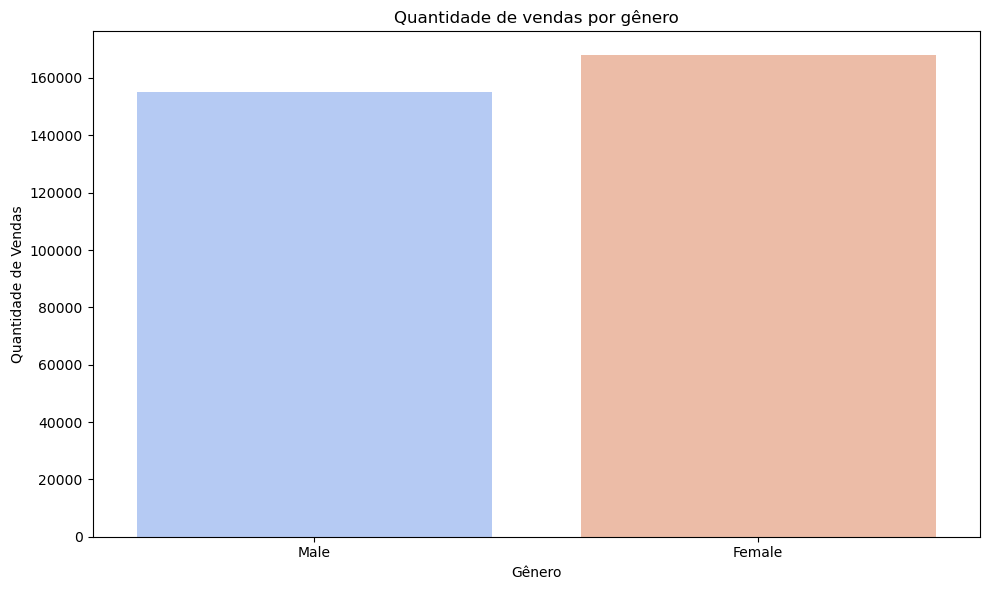

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, hue=sales_by_gender.index, palette='coolwarm')
plt.title('Quantidade de vendas por gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Vendas')
plt.tight_layout()
plt.show()

In [27]:
total_sales = df.groupby('Gender')['Total'].sum()

In [28]:
total_sales

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [29]:
female_male_ratio = df.groupby('Gender')['Invoice ID'].count()

In [30]:
average_ticket = total_sales/female_male_ratio

In [31]:
average_ticket

Gender
Female    335.095659
Male      310.789226
dtype: float64

In [62]:
df.groupby('Gender')['Product line'].value_counts().unstack()

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,84,96,90,64,79,88
Male,86,82,84,88,81,78


In [59]:
df.groupby(['Gender', 'Product line'])['Quantity'].sum().unstack()

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,488,530,514,343,498,496
Male,483,372,438,511,413,424


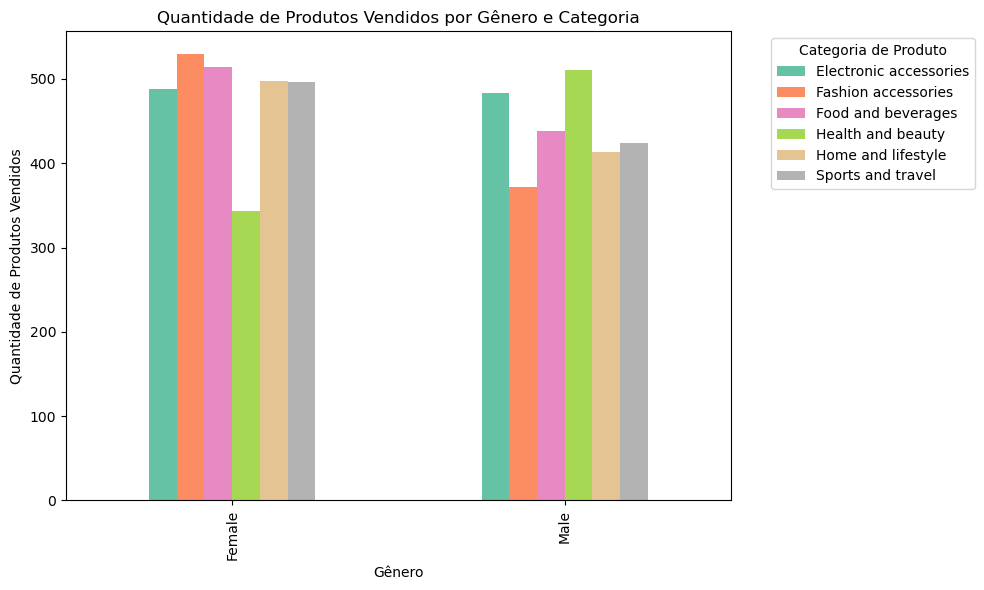

In [61]:
df.groupby(['Gender', 'Product line'])['Quantity'].sum().unstack().plot(
    kind='bar',
    figsize=(10, 6),
    colormap='Set2'
)
plt.title('Quantidade de Produtos Vendidos por Gênero e Categoria')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.legend(title='Categoria de Produto', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

#### 🧠 Análise: Produtos mais comprados por gênero

**Pergunta:**
Há diferença nas categorias de produtos mais compradas por homens e mulheres?

**Resposta:**
Sim, a análise mostra padrões distintos de preferência por gênero:

- **Mulheres** compraram mais:
  - *Fashion accessories*
  - *Home and lifestyle*
  - *Food and beverages*

- **Homens** compraram mais:
  - *Health and beauty*
  - *Sports and travel*

- *Electronic accessories* teve vendas praticamente equilibradas entre os gêneros.

Esses dados podem ser úteis para estratégias de marketing personalizadas, promoções direcionadas e otimização de estoque por público-alvo.

#### 6) 💳 Diferença no ticket médio por método de pagamento

In [63]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [72]:
sales_by_pay_method = df.groupby('Payment')['Total'].sum()

In [71]:
quantity_by_pay_method = df.groupby('Payment')['Invoice ID'].count()

In [73]:
average_ticket_by_pay_method = sales_by_pay_method / quantity_by_pay_method

In [74]:
average_ticket_by_pay_method

Payment
Cash           326.181890
Credit card    324.009878
Ewallet        318.820600
dtype: float64

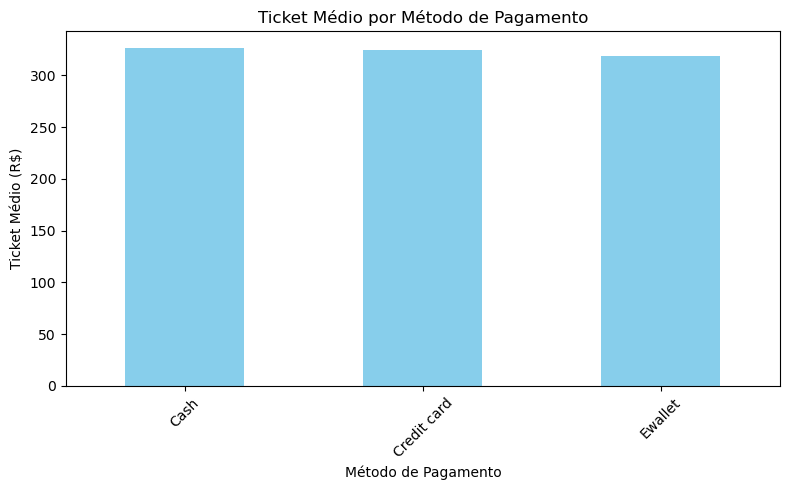

In [76]:
average_ticket_by_pay_method.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,5),
    color='skyblue'
)

plt.title('Ticket Médio por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Ticket Médio (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🧠 Análise: Ticket Médio por Método de Pagamento

**Pergunta:**
Há diferença no ticket médio dependendo do método de pagamento (Cash, Credit card, Ewallet)?

**Resposta:**
Sim, encontramos algumas diferenças interessantes:

- **Cash** teve o maior ticket médio, com **R$ 326,18** por venda.


 - **Credit card** ficou bem próximo, com **R$ 324,01** por venda.


- **Ewallet** apresentou o menor ticket médio, com **R$ 318,82** por venda.

Embora as diferenças não sejam grandes, essas variações podem indicar comportamentos distintos dos clientes. Por exemplo, clientes que pagam em **dinheiro** podem fazer compras de maior valor, enquanto quem usa **Ewallet** pode estar realizando compras menores, mas mais frequentes.

Essas informações podem ser valiosas para otimizar estratégias de marketing e promoções específicas para cada método de pagamento.

#### 7) 📊 Correlação entre avaliação (Rating) e lucro (gross income)

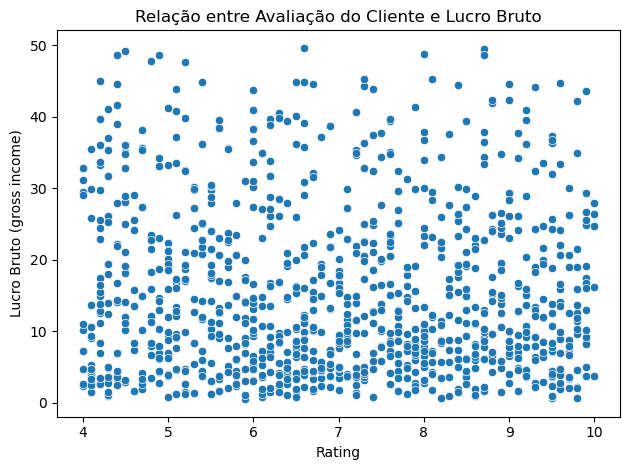

In [79]:
sns.scatterplot(x='Rating', y='gross income', data=df)
plt.title('Relação entre Avaliação do Cliente e Lucro Bruto')
plt.xlabel('Rating')
plt.ylabel('Lucro Bruto (gross income)')
plt.tight_layout()
plt.show()

In [80]:
df['Rating'].corr(df['gross income'])

-0.03644170499701836

#### R: 🧊 Praticamente não há correlação entre a avaliação do cliente e o lucro bruto.
Ou seja, um cliente dar uma nota mais alta ou mais baixa não está relacionado com quanto ele gastou (ou quanto de lucro a compra dele gerou).

Faz sentido, né? Às vezes a pessoa compra bastante e ainda assim não dá nota alta, ou compra pouco e dá nota boa — pode depender mais da experiência no atendimento do que do valor da compra.